In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import itertools

In [2]:
#Cats and dogs
#!rm -r machine-learning/
#!git clone https://github.com/joneikholmkea/machine-learning

In [3]:
IMAGE_SIZE = [100, 100]
epochs = 1
batch_size = 128

In [4]:
traniningFiles = "/Users/daniellorenzen/Desktop/MachineLearning/Convential/machine-learning/img/cat-dog/training_set"
testFiles = "/Users/daniellorenzen/Desktop/MachineLearning/Convential/machine-learning/img/cat-dog/test_set"

In [5]:
image_files = glob(traniningFiles + '/*/*.jp*g')
folders = glob(traniningFiles + '/*')
print(folders)

['/Users/daniellorenzen/Desktop/MachineLearning/Convential/machine-learning/img/cat-dog/training_set/dogs', '/Users/daniellorenzen/Desktop/MachineLearning/Convential/machine-learning/img/cat-dog/training_set/cats']


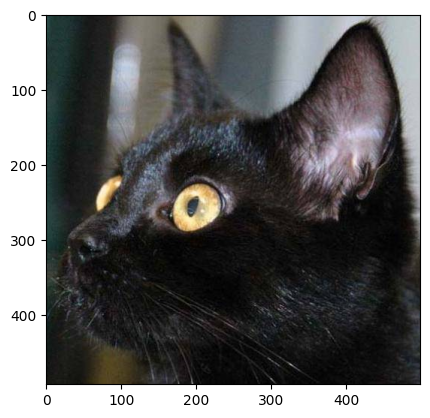

In [6]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

restNet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in restNet.layers:
    layer.trainable = False

In [9]:
layers = Flatten()(restNet.output)
layers = Dense(30, activation='relu')(layers)
layers = Dropout(0.5)(layers)
layers = Dense(30, activation='relu')(layers)
layers = Dense(len(folders), activation='softmax')(layers)

In [10]:
model = Model(inputs=restNet.input, outputs=layers)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 106, 106, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 50, 50, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

training_set = train_datagen.flow_from_directory(
    traniningFiles,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
    class_mode='sparse'
)

test_set = test_datagen.flow_from_directory(
    testFiles,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
    class_mode='sparse'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
print(len(test_set))
validation_steps = len(test_set) // batch_size
print(validation_steps)

16
0


In [15]:
model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs,
    steps_per_epoch=62,
    validation_steps=15
)

62/62 [==============================] - 52s 817ms/step - loss: 0.8142 - accuracy: 0.6690 - val_loss: 0.3739 - val_accuracy: 0.9245


In [16]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

1/1 [==============================] - 0s 403ms/step
[[0.16093597 0.839064  ]]


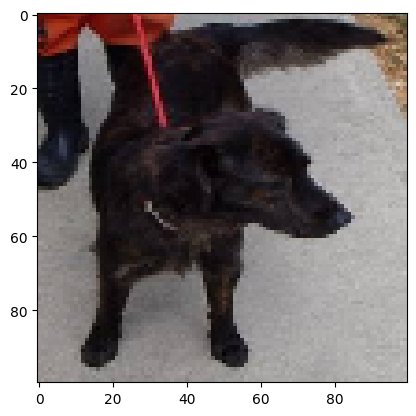

In [17]:
#Predict a single image from the test set
test_image = image.load_img(testFiles + '/dogs/dog.4007.jpg', target_size=IMAGE_SIZE)
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(result)